In [134]:
%matplotlib inline

from pathlib import Path 

import matplotlib.pyplot as plt
from mpl_toolkits import axisartist
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
slide_path = Path('../../../slides/figures/math/')

In [135]:
df = pd.read_csv("../../intro/nydata")

In [139]:
df['DATE2'] = pd.to_datetime(df['DATE'])

In [140]:
df['NAME'].unique()

array(['GANG MILLS NEW YORK', 'SARA NEW YORK', 'SCHROON LAKE NEW YORK',
       'SHERBURNE NEW YORK', 'STONYKILL NEW YORK', 'BINGHAMTON',
       'ISLIP LI MACARTHUR AP', 'NEW YORK LAGUARDIA AP', 'BUFFALO',
       'ALBANY AP', 'GLENS FALLS AP', 'ROCHESTER GTR INTL AP',
       'SYRACUSE HANCOCK INTL AP', 'NEW YORK JFK INTL AP'], dtype=object)

In [141]:
jfk = df[df['NAME'].str.contains("NEW YORK JFK INTL AP")]
lga = df[df['NAME'].str.contains("NEW YORK LAGUARDIA AP")]

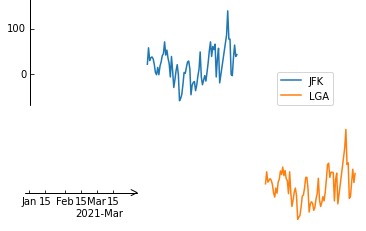

In [169]:
fig = plt.figure()


axx = axisartist.Subplot(fig, 2, 3, 1)
fig.add_subplot(axx)
axx.axis[:].set_visible(False)
axx.axis["x"] = axx.new_floating_axis(1, 0.5)
axx.axis["x"].set_axisline_style("->", size=1.5)
axx.axis["x"].set_ticklabel_direction("-")
axx.axis["x"].set_axis_direction("left")
axx.tick_params(rotation=0)
axx.plot(jfk['DATE'], jfk['DATA_VALUE'], color='white')

axy = axisartist.Subplot(fig, 2, 3, 4)
fig.add_subplot(axy)
axy.axis[:].set_visible(False)
axy.axis["x"] = axy.new_floating_axis(0, 0.5)
axy.axis["x"].set_axisline_style("->", size=1.5)
axy.plot(jfk['DATE2'], jfk['DATA_VALUE'], color='white')
axy.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator))

axd = fig.add_subplot(2,3,2)
axd.plot(jfk['DATE2'], jfk['DATA_VALUE'], color='tab:blue', label="JFK")
axd.axis('off')

axd2 = fig.add_subplot(2,3,6)
axd2.plot(lga['DATE2'], lga['DATA_VALUE'], color='tab:orange', label="LGA")
axd2.axis('off')

fig.legend(bbox_to_anchor=(.85,.67))
fig.savefig(slide_path/"exploding_artist.png")

In [4]:
import matplotlib; matplotlib.__version__

'3.3.1'

In [155]:
df['DATA_VALUE'].describe()

count    1066.000000
mean      -17.965291
std        50.393398
min      -186.000000
25%       -53.000000
50%       -14.000000
75%        13.000000
max       171.000000
Name: DATA_VALUE, dtype: float64